In [32]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import umap
import json
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
DATA_PATH = "./data/recipes_raw_nosource_fn.json"

In [71]:
data = pd.read_json(DATA_PATH)
data = data.drop(['picture_link', 'title'])
data = data.dropna(axis=1)

In [70]:
data = data.T

In [ ]:
i = 0
for ind, row in data.iterrows():
    new_ingredients = []
    for ingredient in data.loc[ind, "ingredients"]:
        ingredient = ingredient.replace(",", "")
        ingredient = ingredient.replace(".", "")
        ingredient = ingredient.replace(";", "")
        ingredient = ingredient.replace("\"", "")
        new_ingredients.append(ingredient)
    if i < 5:
        print(data.loc[ind, "ingredients"])
        i+=1
    else:
        break
#     print(data.loc[ind, "ingredients"])
#     data.loc[ind, "ingredients"] = new_ingredients

In [72]:
dict_of_words = {}

for ingredients in data.loc['ingredients',:]:
    for ingredient in ingredients:
        for word in ingredient.split():
            word = word.rstrip(",.")
            if not word in dict_of_words.keys():
                dict_of_words[word] = 1
            else:
                dict_of_words[word] += 1

In [74]:
df_words = pd.DataFrame.from_dict(dict_of_words, "index", columns=["count"])
df_words = df_words.sort_values('count', ascending=False)

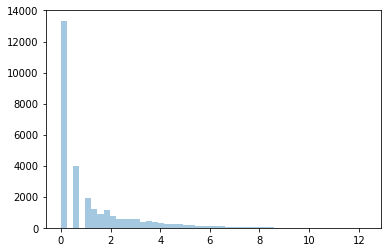

In [75]:
sns.distplot(np.log(df_words.values), kde=False)

In [94]:
top_words = (df_words[10:2010].index.values)
top_words

array(['pepper', '3', 'ground', ..., 'c', 'rustic', 'fully'], dtype=object)

In [95]:
len(data.T)

59628

In [102]:
zero_data = np.zeros(shape=(len(data.T), len(list(top_words))))
final_data = pd.DataFrame(zero_data, columns=list(top_words))

final_data

,pepper,3,ground,tablespoon,oil,salt,4,fresh,or,for,...,Slaw,bun,purchased,de-veined,mung,Gravy,Island,c,rustic,fully
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
#final_data[57,"cider"]
final_data.loc[57:58, "pepper"]

57    0.0
58    0.0
Name: pepper, dtype: float64

In [67]:
# dict_of_words = {}

# for ingredients in data.loc['ingredients',:]:
#     for ingredient in ingredients:
#         for word in ingredient.split():
#             word = word.rstrip(",.")
#             if not word in dict_of_words.keys():
#                 dict_of_words[word] = 1
#             else:
#                 dict_of_words[word] += 1
data = data.T
data

,ingredients,instructions
p3pKOD6jIHEcjf20CCXohP8uqkG5dGi,"[1/2 cup celery, finely chopped, 1 small green...",Toss ingredients lightly and spoon into a butt...
S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO,"[2 pounds skirt steak, cut into 1/2-inch dice,...",Watch how to make this recipe.\nSprinkle the s...
o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK,"[1 1/2 cups dried black beans, picked over and...","In a large saucepan, let the beans soak in eno..."
5l1yTSYFifF/M2dfbD6DX28WWQpLWNK,"[1 1/4 pounds ground chuck, One 15-ounce can t...",Watch how to make this recipe.\nPreheat the ov...
kRBQSWtqYWqtkb34FGeenBSbC32gIdO,"[1 cup rice, brown, medium-grain, cooked, 1/2-...",Special equipment: sushi mat\nCook the brown r...
PmoGGX9RC5zbMJXtZH1SKzWKLFX4Aii,"[1 tablespoon extra-virgin olive oil, 2 baby I...",Heat a large nonstick skillet over medium-high...
g2RYP1spIUlAYsytDMsdfLNQEOnLUrO,[1/2 teaspoon lightly crumbled saffron threads...,Sprinkle the saffron into 1/4 cup hot water; l...
94NWE4F4C5NzgH0zYqSdmPM/G55BjKO,[4 top--sliced hot-dog buns (or fashion your o...,"If using top-sliced buns, spread softened butt..."
HdIbPB/8cgk17hAzbc2jUN4VBn//QKS,"[6 green or red bell peppers, 1/2 cup olive oi...",Cut around the stems of the peppers (reserving...
mC7Nb4F2S.DMCjZ39kzS/ak9GqEp4iO,"[1 medium head cauliflower (about 2 pounds), c...",Preheat the oven to 450 degrees F. Put the cau...


In [113]:
top_words_set = set(top_words)
i = 0
for ingredients in data.loc['ingredients',:]:
    bigset = set()
    for ingredient in ingredients:
        bigset.update(ingredient.split())
    for ingredient in top_words_set.intersection(bigset):
        final_data.loc[i,ingredient] = 1
    if (i % 100 == 0):
        print(bigset)
    i += 1

{'dry', 'crumbs', 'crushed', 'celery,', '3/4', 'Dash', 'cracker', 'butter', '1/4', 'cream', 'cups', 'heavy', 'crabmeat', 'sauce', 'finely', 'melted', 'onions', 'small', 'sliced', 'teaspoon', 'pound', 'parsley', '1/2', 'chopped', '1', 'mustard', 'pepper', 'coarsely', 'teaspoons', 'cup', 'salt', 'hot', 'green'}
{'Halved', 'sausage', 'vanilla', 'wild', 'the', 'tablespoons', 'rice', 'whole', 'and', '2', '1/4', 'Pancake', 'milk,', 'cups', '3', 'plus', 'warmed,', 'baking', 'serving', 'melon', 'butter,', 'needed', 'salted', 'teaspoon', 'if', '1/2', '1', 'more', 'for', 'eggs', 'links', 'chicken', 'powder', 'sugar', 'cup', 'salt', 'melted,', 'flour', 'syrup,', 'tablespoon', 'strawberries,', 'chunks,', 'large', 'Honeydew', 'Blueberries,', 'all-purpose', 'skillet', '6'}
{'peeled,', 'cut', 'the', 'freshly', 'yellow', 'medium', 'juice', 'relish', 'tomatoes,', 'pickle', 'Vegetable', 'teaspoons', 'cup)', 'slightly', 'Bay', 'butterflied', 'egg', 'Rolls,', 'Hoagie', 'horseradish', 'apple', 'toasted', '

In [114]:
import sklearn

In [118]:
pca = sklearn.decomposition.PCA(n_components=2)
pcaed = pca.fit_transform(final_data)

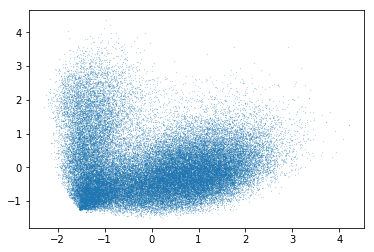

In [129]:
import matplotlib.pyplot as plt
plt.scatter(pcaed[:, 0], pcaed[:, 1], s=0.01)

In [124]:
pcaed.shape

(59628, 2)

In [ ]:
embedding = umap.UMAP(n_neighbors=100,
                      min_dist=0.3,
                      metric='correlation').fit_transform(final_data)

In [ ]:
type(final_data)